<a href="https://colab.research.google.com/github/neladwi/Praktikum_Data_Mining/blob/main/Copy_of_Praktik_Algoritma_Apriori_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Import library
import pandas as pd
import seaborn as sns

# Apriori


In [91]:
# Membaca dataset csv
df = pd.read_csv("DatasetBaru - Sheet1.csv")

In [92]:
# Lihat data
df

,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
6,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN


In [5]:
# 1 Item set
df.sum()

Bread           3.0
Eggs            1.0
Yogurt          3.0
Milk            2.0
Corn            6.0
Ice Cream       5.0
Apple           5.0
Cheese          2.0
Nutmeg          4.0
Dill            3.0
Onion           3.0
Butter          4.0
Sugar           3.0
Kidney Beans    2.0
dtype: float64

In [6]:
# Itemnya ada apa aja si
df.columns

Index(['Bread', 'Eggs', 'Yogurt', 'Milk', 'Corn', 'Ice Cream', 'Apple',
       'Cheese', 'Nutmeg', 'Dill', 'Onion', 'Butter', 'Sugar', 'Kidney Beans'],
      dtype='object')

In [7]:
# 2 Item set
from itertools import permutations
# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('Bread', 'Eggs'),
 ('Bread', 'Yogurt'),
 ('Bread', 'Milk'),
 ('Bread', 'Corn'),
 ('Bread', 'Ice Cream'),
 ('Bread', 'Apple'),
 ('Bread', 'Cheese'),
 ('Bread', 'Nutmeg'),
 ('Bread', 'Dill'),
 ('Bread', 'Onion'),
 ('Bread', 'Butter'),
 ('Bread', 'Sugar'),
 ('Bread', 'Kidney Beans'),
 ('Eggs', 'Bread'),
 ('Eggs', 'Yogurt'),
 ('Eggs', 'Milk'),
 ('Eggs', 'Corn'),
 ('Eggs', 'Ice Cream'),
 ('Eggs', 'Apple'),
 ('Eggs', 'Cheese'),
 ('Eggs', 'Nutmeg'),
 ('Eggs', 'Dill'),
 ('Eggs', 'Onion'),
 ('Eggs', 'Butter'),
 ('Eggs', 'Sugar'),
 ('Eggs', 'Kidney Beans'),
 ('Yogurt', 'Bread'),
 ('Yogurt', 'Eggs'),
 ('Yogurt', 'Milk'),
 ('Yogurt', 'Corn'),
 ('Yogurt', 'Ice Cream'),
 ('Yogurt', 'Apple'),
 ('Yogurt', 'Cheese'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Dill'),
 ('Yogurt', 'Onion'),
 ('Yogurt', 'Butter'),
 ('Yogurt', 'Sugar'),
 ('Yogurt', 'Kidney Beans'),
 ('Milk', 'Bread'),
 ('Milk', 'Eggs'),
 ('Milk', 'Yogurt'),
 ('Milk', 'Corn'),
 ('Milk', 'Ice Cream'),
 ('Milk', 'Apple'),
 ('Milk', 'Cheese'),
 ('M

In [8]:
# Filter yang ada isinya aja yang dihitung
rule_baru = []
for rule in rules:
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('Bread', 'Yogurt'),
 ('Bread', 'Corn'),
 ('Bread', 'Ice Cream'),
 ('Bread', 'Cheese'),
 ('Bread', 'Nutmeg'),
 ('Bread', 'Dill'),
 ('Bread', 'Onion'),
 ('Bread', 'Sugar'),
 ('Eggs', 'Corn'),
 ('Eggs', 'Apple'),
 ('Eggs', 'Nutmeg'),
 ('Eggs', 'Butter'),
 ('Eggs', 'Kidney Beans'),
 ('Yogurt', 'Bread'),
 ('Yogurt', 'Corn'),
 ('Yogurt', 'Ice Cream'),
 ('Yogurt', 'Cheese'),
 ('Yogurt', 'Nutmeg'),
 ('Yogurt', 'Dill'),
 ('Yogurt', 'Onion'),
 ('Yogurt', 'Sugar'),
 ('Milk', 'Ice Cream'),
 ('Milk', 'Apple'),
 ('Milk', 'Nutmeg'),
 ('Milk', 'Onion'),
 ('Corn', 'Bread'),
 ('Corn', 'Eggs'),
 ('Corn', 'Yogurt'),
 ('Corn', 'Ice Cream'),
 ('Corn', 'Apple'),
 ('Corn', 'Cheese'),
 ('Corn', 'Nutmeg'),
 ('Corn', 'Dill'),
 ('Corn', 'Onion'),
 ('Corn', 'Butter'),
 ('Corn', 'Sugar'),
 ('Corn', 'Kidney Beans'),
 ('Ice Cream', 'Bread'),
 ('Ice Cream', 'Yogurt'),
 ('Ice Cream', 'Milk'),
 ('Ice Cream', 'Corn'),
 ('Ice Cream', 'Apple'),
 ('Ice Cream', 'Cheese'),
 ('Ice Cream', 'Nutmeg'),
 ('Ice Cream', 'Dill'),
 

In [94]:
# Mengitung banyak df muncul
hitung = {} #ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('Bread', 'Yogurt')": 3,
 "('Bread', 'Corn')": 2,
 "('Bread', 'Ice Cream')": 3,
 "('Bread', 'Cheese')": 1,
 "('Bread', 'Nutmeg')": 1,
 "('Bread', 'Dill')": 1,
 "('Bread', 'Onion')": 1,
 "('Bread', 'Sugar')": 3,
 "('Eggs', 'Corn')": 1,
 "('Eggs', 'Apple')": 1,
 "('Eggs', 'Nutmeg')": 1,
 "('Eggs', 'Butter')": 1,
 "('Eggs', 'Kidney Beans')": 1,
 "('Yogurt', 'Bread')": 3,
 "('Yogurt', 'Corn')": 2,
 "('Yogurt', 'Ice Cream')": 3,
 "('Yogurt', 'Cheese')": 1,
 "('Yogurt', 'Nutmeg')": 1,
 "('Yogurt', 'Dill')": 1,
 "('Yogurt', 'Onion')": 1,
 "('Yogurt', 'Sugar')": 3,
 "('Milk', 'Ice Cream')": 1,
 "('Milk', 'Apple')": 1,
 "('Milk', 'Nutmeg')": 1,
 "('Milk', 'Onion')": 1,
 "('Corn', 'Bread')": 2,
 "('Corn', 'Eggs')": 1,
 "('Corn', 'Yogurt')": 2,
 "('Corn', 'Ice Cream')": 2,
 "('Corn', 'Apple')": 4,
 "('Corn', 'Cheese')": 2,
 "('Corn', 'Nutmeg')": 2,
 "('Corn', 'Dill')": 3,
 "('Corn', 'Onion')": 2,
 "('Corn', 'Butter')": 4,
 "('Corn', 'Sugar')": 2,
 "('Corn', 'Kidney Beans')": 2,
 "('Ice Cream', 

In [19]:
# List support
supp = [i/len(df)*100 for i in hitung.values()]

print("----")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}")

----
('Bread', 'Yogurt') support = 30.0
('Bread', 'Corn') support = 20.0
('Bread', 'Ice Cream') support = 30.0
('Bread', 'Cheese') support = 10.0
('Bread', 'Nutmeg') support = 10.0
('Bread', 'Dill') support = 10.0
('Bread', 'Onion') support = 10.0
('Bread', 'Sugar') support = 30.0
('Eggs', 'Corn') support = 10.0
('Eggs', 'Apple') support = 10.0
('Eggs', 'Nutmeg') support = 10.0
('Eggs', 'Butter') support = 10.0
('Eggs', 'Kidney Beans') support = 10.0
('Yogurt', 'Bread') support = 30.0
('Yogurt', 'Corn') support = 20.0
('Yogurt', 'Ice Cream') support = 30.0
('Yogurt', 'Cheese') support = 10.0
('Yogurt', 'Nutmeg') support = 10.0
('Yogurt', 'Dill') support = 10.0
('Yogurt', 'Onion') support = 10.0
('Yogurt', 'Sugar') support = 30.0
('Milk', 'Ice Cream') support = 10.0
('Milk', 'Apple') support = 10.0
('Milk', 'Nutmeg') support = 10.0
('Milk', 'Onion') support = 10.0
('Corn', 'Bread') support = 20.0
('Corn', 'Eggs') support = 10.0
('Corn', 'Yogurt') support = 20.0
('Corn', 'Ice Cream') sup

In [95]:
# Contoh penggunaan split
a = "saya, kamu"
a.split(".")

['saya, kamu']

In [96]:
# List Confidens untuk hitung persen
#print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("----")
for item,ab in hitung.items():
  # A -> B
  i = eval(item)
  print(f"{i[0]} -> {i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

----
Bread -> Yogurt Confidence = 100.0%
Bread -> Corn Confidence = 66.66666666666666%
Bread -> Ice Cream Confidence = 100.0%
Bread -> Cheese Confidence = 33.33333333333333%
Bread -> Nutmeg Confidence = 33.33333333333333%
Bread -> Dill Confidence = 33.33333333333333%
Bread -> Onion Confidence = 33.33333333333333%
Bread -> Sugar Confidence = 100.0%
Eggs -> Corn Confidence = 100.0%
Eggs -> Apple Confidence = 100.0%
Eggs -> Nutmeg Confidence = 100.0%
Eggs -> Butter Confidence = 100.0%
Eggs -> Kidney Beans Confidence = 100.0%
Yogurt -> Bread Confidence = 100.0%
Yogurt -> Corn Confidence = 66.66666666666666%
Yogurt -> Ice Cream Confidence = 100.0%
Yogurt -> Cheese Confidence = 33.33333333333333%
Yogurt -> Nutmeg Confidence = 33.33333333333333%
Yogurt -> Dill Confidence = 33.33333333333333%
Yogurt -> Onion Confidence = 33.33333333333333%
Yogurt -> Sugar Confidence = 100.0%
Milk -> Ice Cream Confidence = 50.0%
Milk -> Apple Confidence = 50.0%
Milk -> Nutmeg Confidence = 50.0%
Milk -> Onion Co

# KNN

In [34]:
# CRISP-DM

1. Collect data
2. Jelasin kolom-kolomnya apa aja

## Business Understanding

Goals DM : Kita mau cari tahu tentang siapa aja yang selamat dari titanic dan kira-kira apa kriterianya

Visi - Misi , dsb

# Data Understanding

1. Collect Data

In [35]:
df = pd.read_csv('train.csv')

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Setelah collect data kita pahami datanya dulu seperti apa, caranya dengan melakukan visualisasi

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

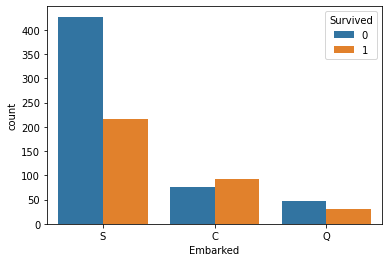

In [39]:
sns.countplot(data=df,x="Embarked",hue="Survived")

Kasih penjelasan kolom dengan cara melihat sumber 
maksud dari setiap kolom itu apa

# Data Preparation

In [97]:
# Fungsi dari pandas untuk memeriksa apakah dataframe ada nilai null
df.isna().sum() / len(df) * 100

Bread           70.0
Eggs            90.0
Yogurt          70.0
Milk            80.0
Corn            40.0
Ice Cream       50.0
Apple           50.0
Cheese          80.0
Nutmeg          60.0
Dill            70.0
Onion           70.0
Butter          60.0
Sugar           70.0
Kidney Beans    80.0
dtype: float64

In [99]:
# Untuk mengcopy df2 dan mengapus kolom Cabin
df2 = df.copy(deep=True)
df2.drop(columns=["Cabin"],inplace=True) # eror karena kolom kabin sudah dihapus

KeyError: ignored

In [100]:
# Fungsi dari pandas untuk memeriksa apakah dataframe ada nilai null
df2.isna().sum()

Bread           7
Eggs            9
Yogurt          7
Milk            8
Corn            4
Ice Cream       5
Apple           5
Cheese          8
Nutmeg          6
Dill            7
Onion           7
Butter          6
Sugar           7
Kidney Beans    8
dtype: int64

In [101]:
# Fungsi fillna mengisi nilai yang kosong.
df2.Age = df.Age.fillna(df.Age.mean())
df2.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

AttributeError: ignored

In [33]:
# Fungsi dari pandas untuk memeriksa apakah dataframe ada nilai null
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Encoding

In [ ]:
# Setelah mengatasi missing value, selanjutnya kita menghapus kolom yang tidak diperlukan

In [102]:
# Pertama hapus kolom yang kurang penting
# Kita hapus kolom passanger id sama name
# Hapus kolom yang terlalu beragam
df2.drop(columns=["Ticket"],inplace=True) # Eror karena telah terhapus

KeyError: ignored

In [103]:
# Melihat df2
df2

,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
6,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN


In [104]:
# Encoding
# Get dummies untuk encoding
# Merubah tipe data string/kategori menjadi numerik
df3 = pd.get_dummies(df2, drop_first=True)

In [105]:
# Melihat df3
df3

,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
6,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
7,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
8,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN


In [107]:
# membuat df baru dan menghapus kolom survived
TARGET = df3.Survived 
data = df3.drop(columns=["Survived"]) # eror karena kolom survived telah terhapus

AttributeError: ignored

In [111]:
# import library
import plotly.express as px

In [112]:
# menampilkan visualisasi data
px.scatter_3d(df3,x="Age", y="Fare", z="Pclass", color="Survived")

ValueError: ignored

In [113]:
# membuat sampe
sample = data.sample()

In [114]:
# melihat sample
sample

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
24,3,8.0,3,1,21.075,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
# import library
from sklearn.neighbors import KNeighborsClassifier

In [116]:
# untuk predict data
knn = KNeighborsClassifier().fit(data,TARGET)

In [117]:
# menampilkan hasil sample
knn.predict(sample)

array([0])

In [118]:
# membuat sample2
sample2 = df3.sample()

In [119]:
# melihat sample2
sample2

,Bread,Eggs,Yogurt,Milk,Corn,Ice Cream,Apple,Cheese,Nutmeg,Dill,Onion,Butter,Sugar,Kidney Beans
5,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0


In [121]:
# melihat hasil predict dengan menghapus kolom survived
knn.predict(sample2.drop(columns=["Survived"])) #eror karena kolom survived telah terhapus

KeyError: ignored

In [50]:
# Materi SKlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, TARGET, test_size=0.33, random_state=42)

In [51]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
6,1,54.000000,0,0,51.8625,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
718,3,29.699118,0,0,15.5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
685,2,25.000000,1,2,41.5792,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73,3,26.000000,1,0,14.4542,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
882,3,22.000000,0,0,10.5167,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
270,1,29.699118,0,0,31.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,3,41.000000,2,0,14.1083,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
435,1,14.000000,1,2,120.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
